<a href="https://colab.research.google.com/github/Audorion/Random-Search-Algorithm-without-SciPy/blob/main/RandomSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random

from google.colab import files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def your_function(x_1, x_2, w0, w1, w2):
    return w0 + w1 * x_1 + w2 * x_2  # y = c + a*X1 + b*X2

In [ ]:
def cost_func(x_1, x_2, w0, w1, w2, _y):  # Подсчёт ошибки
    total_error = 0
    count = x_1.size
    for i in range(count):
      total_error += (_y[i] - (w0 + w1 * x_1[i] + w2 * x_2[i])) ** 2
    return total_error / count

In [ ]:
def update_wights(x_1, x_2, _y, max_iter, function):  # Нахождение коэффецентов
    MAXSIZE = 3  # Количество искомых коэффецентов
    w = np.empty(MAXSIZE, dtype=np.float32)
    new_w = np.empty(MAXSIZE, dtype=np.float32)

    l = [-20, -10, 0]  # Нижние границы
    h = [-10, 0, 10]  # Верхние границы

    # Случайная инициализация кооэфицентов
    w[0] = random.uniform(l[0], h[0])
    w[1] = random.uniform(l[1], h[1])
    w[2] = random.uniform(l[2], h[2])

    new_w[0] = w[0]
    new_w[1] = w[1]
    new_w[2] = w[2]

    for _ in range(max_iter):
        # Обновление кооэфицентов на случайный сдвиг
        for t in range(MAXSIZE):
            new_w[t] = l[t] + random.random() * (h[t] - l[t])
        # Проверка на минимизацию
        if cost_func(x_1, x_2, new_w[0], new_w[1], new_w[2], _y) < cost_func(x_1, x_2, w[0], w[1], w[2], _y):
            # Обновление коэффецентов и границ
            for t in range(MAXSIZE):
                w[t] = new_w[t]
                h[t] = w[t] + 5
                l[t] = w[t] - 5
    print("Невязка:", cost_func(x_1, x_2,w[0], w[1], w[2], _y))  # Вывод ошибки
    print("Коэфиценты:", w[0], w[1], w[2])  # Вывод весов
    return w[0], w[1], w[2], cost_func(x_1, x_2, w[0], w[1], w[2], _y)

In [ ]:
def predicted(x_1, x_2, y, a, b, c):
  pr = np.empty(19, dtype=np.float32)
  for i in range(19):
    pr[i] = (a + b * x_1[i] + c * x_2[i])
  return pr

In [ ]:
#Загрузка файла
uploaded = files.upload()
import io

Saving Data.csv to Data (1).csv


In [ ]:
#Считывания данных
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']), sep=";", dtype={'x1': np.float64, 'x2': np.float64})
print(data)

      x1   x2      y
0   36.0  2.0  45.90
1   34.0  1.6  23.40
2   27.0  2.3  46.80
3   25.0  2.5  50.40
4   22.0  1.3  23.40
5   21.0  0.6  10.35
6   19.0  2.6  66.60
7   18.0  0.6   7.11
8   17.0  1.1  14.40
9   15.0  2.4  29.70
10  14.0  1.4  17.38
11   9.0  0.4   6.60
12   8.0  2.2  28.05
13   4.5  1.0   7.81
14   3.7  2.9  15.18
15   3.4  0.9   5.94
16   3.0  1.7   6.38
17   2.6  0.8   6.82
18   2.0  2.1   8.80
19   1.9  1.7   8.25


In [ ]:
#Инициализация данных
X = data.iloc[:, 0:2]
w = np.ones(20)
W = pd.DataFrame(w)
X['Ones'] = W
print(X)
print('   ')
Y = data.iloc[:, 2]
print(Y[:5])

      x1   x2  Ones
0   36.0  2.0   1.0
1   34.0  1.6   1.0
2   27.0  2.3   1.0
3   25.0  2.5   1.0
4   22.0  1.3   1.0
5   21.0  0.6   1.0
6   19.0  2.6   1.0
7   18.0  0.6   1.0
8   17.0  1.1   1.0
9   15.0  2.4   1.0
10  14.0  1.4   1.0
11   9.0  0.4   1.0
12   8.0  2.2   1.0
13   4.5  1.0   1.0
14   3.7  2.9   1.0
15   3.4  0.9   1.0
16   3.0  1.7   1.0
17   2.6  0.8   1.0
18   2.0  2.1   1.0
19   1.9  1.7   1.0
   
0    45.9
1    23.4
2    46.8
3    50.4
4    23.4
Name: y, dtype: float64


Text(0.5, 0, 'Y')

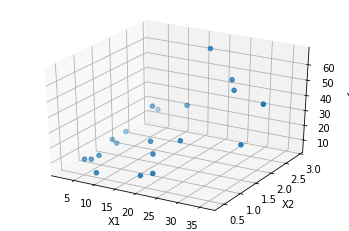

In [ ]:
# Визуализация данных 
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [ ]:
a,b,c,cost = update_wights(X.iloc[:,0],X.iloc[:,1],Y,10000,your_function)

Невязка: 78.65404252309818
Коэфиценты: -14.278664 0.8955865 13.991849


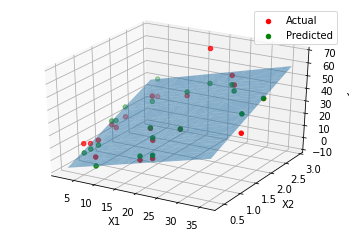

In [ ]:
predictedY = np.dot(X,[b,c,a])
#  Подготовка данных для визуализации
xx, yy, zz = np.meshgrid(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot([b,c,a])

# Визуализация предсказанных данных и реальных. 
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], Y, color='r', label='Actual')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], predictedY, color='g', label='Predicted')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()
plt.show()